In [1]:
import random
import os
import glob
import csv
import shutil
import math
import json
from itertools import combinations, product, islice

import pandas as pd
import numpy as np
from multiprocessing import Pool, Lock, cpu_count

In [2]:
# configure data path
current_path = os.path.dirname(os.path.abspath("__file__"))
data_path = os.path.join(current_path, "..", "data")

data_path = os.path.normpath(data_path)
print(data_path)

/home/dk/Desktop/space_weather_econ/data


In [3]:
# read the business and economic data at zcta and state levels

data_zcta = pd.read_csv(os.path.join(data_path, "df_zcta.csv"))
data_state = pd.read_csv(os.path.join(data_path, "df_rto_stats.csv"))

In [4]:
# state levels
data_state.groupby("REGIONS")[["POP20BG"]].sum().reset_index()

,REGIONS,POP20BG
0,CAISO,36592680
1,ERCOT,25771826
2,FRCC,20332393
3,ISONE,14155945
4,MISO,44732745
5,NYISO,22038595
6,NorthernGridConnected,16560671
7,NorthernGridUnconnected,4327744
8,NotOrder1000,2551988
9,PJM,66127547


In [5]:
# zcta
data_zcta.groupby("REGIONS")[["EMP", "EST", "POP20"]].sum().reset_index()

,REGIONS,EMP,EST,POP20
0,CAISO,12953016,930647,36669676
1,ERCOT,9363417,571573,25756383
2,FRCC,6979790,585058,20269759
3,ISONE,5779762,366502,14160438
4,MISO,16998586,1051362,44656227
5,NYISO,8097251,584840,21994860
6,NorthernGridConnected,6492293,463393,16095613
7,NorthernGridUnconnected,1227364,111484,4593872
8,NotOrder1000,769158,50776,2506448
9,PJM,25418712,1548042,65742117


### Modeling Economic Impacts

In [6]:
# percentage of businesses affected due to space weather possibilities, 1%, 5%, 10%, 25%, 50%, 75%, 100%

possible_business_impacts = [0, 0.01, 0.05, 0.1]
regions = list(data_zcta.REGIONS.unique())

The scenarios are a combination of possible failure rates for the given regions

${n \choose m} = \frac{n!}{m!(n-m)!}$

In [7]:
scenario_dir = os.path.join(data_path, "scenarios")

try:
    if os.path.exists:
        shutil.rmtree(scenario_dir)
    os.mkdir(scenario_dir)
        
except FileNotFoundError as err:
    os.mkdir(scenario_dir)


def process_and_write(scenario_subset, worker_id):
    file_path = os.path.join(scenario_dir, f'scenarios_worker_{worker_id}.csv')
    with open(file_path, 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        for scenario_tuple in scenario_subset:
            writer.writerow(scenario_tuple)

def batch_iterator(iterable, batch_size=1000):
    it = iter(iterable)
    while True:
        chunk = list(islice(it, batch_size))
        if not chunk:
            return
        yield chunk

def main():
    num_cores = maths.ceil(0.8 * cpu_count())  # Using 80% of the cpus to speed

    scenario_generator = product(possible_business_impacts, repeat=len(regions))
    scenario_batches = batch_iterator(scenario_generator, batch_size=1000)

    with Pool(num_cores) as pool:
        worker_id = 0
        for batch in scenario_batches:
            pool.apply_async(process_and_write, args=(batch, worker_id))
            worker_id = (worker_id + 1) % num_cores

        pool.close()
        pool.join()

main()

In [8]:
def read_and_concatenate_csv(directory):
    all_files = glob.glob(os.path.join(directory, 'scenarios_worker_*.csv'))
    df_list = []

    for filename in all_files:
        df = pd.read_csv(filename, header=None)
        df_list.append(df)

    return pd.concat(df_list, ignore_index=True)


scenario_dir = os.path.join(data_path, "scenarios")
combined_df = read_and_concatenate_csv(scenario_dir)
combined_df.columns = regions
combined_df.head(10)

,ISONE,NYISO,NotOrder1000,PJM,SERTP,SCRTP,FRCC,MISO,SPP,WestConnectNonEnrolled,NorthernGridConnected,NorthernGridUnconnected,ERCOT,WestConnect,CAISO
0,0.01,0.01,0.01,0.01,0.01,0.01,0.05,0.01,0.01,0.05,0.1,0.05,0.01,0.10,0.05
1,0.01,0.01,0.01,0.01,0.01,0.01,0.05,0.01,0.01,0.05,0.1,0.05,0.01,0.10,0.10
2,0.01,0.01,0.01,0.01,0.01,0.01,0.05,0.01,0.01,0.05,0.1,0.05,0.05,0.01,0.01
3,0.01,0.01,0.01,0.01,0.01,0.01,0.05,0.01,0.01,0.05,0.1,0.05,0.05,0.01,0.05
4,0.01,0.01,0.01,0.01,0.01,0.01,0.05,0.01,0.01,0.05,0.1,0.05,0.05,0.01,0.10
5,0.01,0.01,0.01,0.01,0.01,0.01,0.05,0.01,0.01,0.05,0.1,0.05,0.05,0.05,0.01
6,0.01,0.01,0.01,0.01,0.01,0.01,0.05,0.01,0.01,0.05,0.1,0.05,0.05,0.05,0.05
7,0.01,0.01,0.01,0.01,0.01,0.01,0.05,0.01,0.01,0.05,0.1,0.05,0.05,0.05,0.10
8,0.01,0.01,0.01,0.01,0.01,0.01,0.05,0.01,0.01,0.05,0.1,0.05,0.05,0.10,0.01
9,0.01,0.01,0.01,0.01,0.01,0.01,0.05,0.01,0.01,0.05,0.1,0.05,0.05,0.10,0.05


In [9]:
combined_df.shape

(14348907, 15)

In [10]:
# Business patterns and populations in the regions

region_business_df = data_zcta.groupby("REGIONS")[["EMP", "EST", "POP20"]].sum().reset_index()
region_business_df

,REGIONS,EMP,EST,POP20
0,CAISO,12953016,930647,36669676
1,ERCOT,9363417,571573,25756383
2,FRCC,6979790,585058,20269759
3,ISONE,5779762,366502,14160438
4,MISO,16998586,1051362,44656227
5,NYISO,8097251,584840,21994860
6,NorthernGridConnected,6492293,463393,16095613
7,NorthernGridUnconnected,1227364,111484,4593872
8,NotOrder1000,769158,50776,2506448
9,PJM,25418712,1548042,65742117


In [12]:
df_business = region_business_df.set_index('REGIONS')

for attribute in ['EMP', 'EST', 'POP20']:
    
    # Retrieve the column from df_business
    business_values = df_business[attribute]

    for region in combined_df.columns:
        if region not in business_values.index:
            continue

        combined_df[f'impact_{attribute}'] = combined_df[region] * business_values.loc[region]



In [13]:
combined_df

,ISONE,NYISO,NotOrder1000,PJM,SERTP,SCRTP,FRCC,MISO,SPP,WestConnectNonEnrolled,NorthernGridConnected,NorthernGridUnconnected,ERCOT,WestConnect,CAISO,impact_EMP,impact_EST,impact_POP20
0,0.01,0.01,0.01,0.01,0.01,0.01,0.05,0.01,0.01,0.05,0.10,0.05,0.01,0.10,0.05,647650.80,46532.35,1833483.80
1,0.01,0.01,0.01,0.01,0.01,0.01,0.05,0.01,0.01,0.05,0.10,0.05,0.01,0.10,0.10,1295301.60,93064.70,3666967.60
2,0.01,0.01,0.01,0.01,0.01,0.01,0.05,0.01,0.01,0.05,0.10,0.05,0.05,0.01,0.01,129530.16,9306.47,366696.76
3,0.01,0.01,0.01,0.01,0.01,0.01,0.05,0.01,0.01,0.05,0.10,0.05,0.05,0.01,0.05,647650.80,46532.35,1833483.80
4,0.01,0.01,0.01,0.01,0.01,0.01,0.05,0.01,0.01,0.05,0.10,0.05,0.05,0.01,0.10,1295301.60,93064.70,3666967.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14348902,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.05,0.10,0.01,0.10,0.01,0.10,0.01,129530.16,9306.47,366696.76
14348903,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.05,0.10,0.01,0.10,0.01,0.10,0.05,647650.80,46532.35,1833483.80
14348904,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.05,0.10,0.01,0.10,0.01,0.10,0.10,1295301.60,93064.70,3666967.60
14348905,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.05,0.10,0.01,0.10,0.05,0.01,0.01,129530.16,9306.47,366696.76


<Axes: >

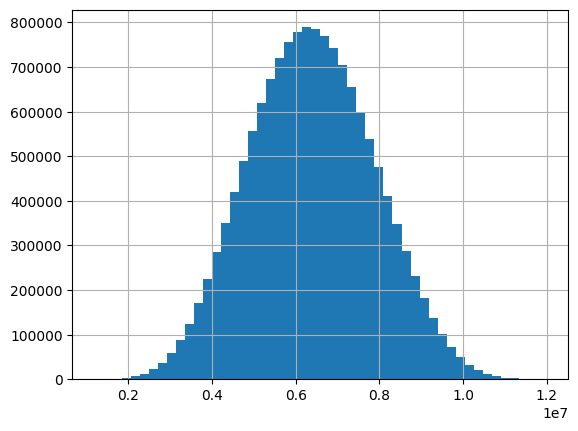

In [59]:
sums.hist(bins=50)